In [1]:
%pylab inline
import pandas as pd


Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = pd.read_csv('data/iris.csv')
iris_grouped = iris.groupby('species')

keys = iris_grouped.groups.keys()
values = [iris_grouped.get_group(key).sepal_length.tolist() for key in keys]

Text(0,0.5,u'Sepal Length (cm)')

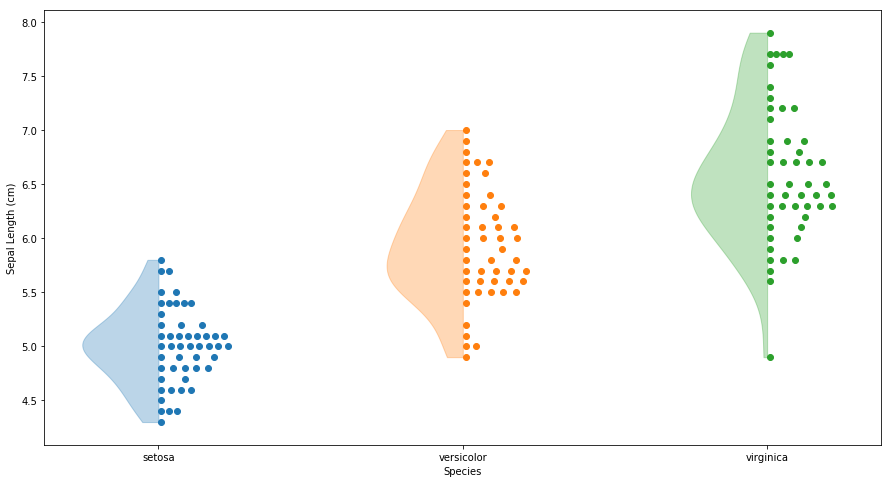

In [3]:
f, ax = plt.subplots(figsize=(15, 8))

vp = ax.violinplot(values, points=200, 
                   widths=0.5, showmeans=False, 
                   showextrema=False, showmedians=False)
for bindex, b in enumerate(vp['bodies']):
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
    value = np.array(values[bindex])
    y_path = b.get_paths()[0].vertices[:, 1]
    x_path = b.get_paths()[0].vertices[:, 0]
    xindex = np.array([0.99] * len(value))
    marked = []
    for v in value:
        yindex = np.argmin(np.abs(y_path-v))
        # fetch points from this yindex, less than or equidistant than our original point
        yval = y_path[yindex]
        min_dist = np.abs(yval-v)
        distances = np.abs(value-yval)
        dist_lesser_or_equ = np.where(distances <= min_dist)
        dist_lesser_or_equ = dist_lesser_or_equ[0]
        n_points = len(dist_lesser_or_equ)
        total_width = x_path[yindex]-1-bindex
        distance_per_point = total_width/float(n_points)
        for index, i in enumerate(dist_lesser_or_equ):
            if i not in marked:
                xindex[i] = xindex[i] + index*distance_per_point
                marked.append(i)

    p = ax.scatter(2+bindex-xindex, value)
    b.set_color(p.get_facecolor()[0])
ax.set_xticks(range(1, len(keys)+1))
ax.set_xticklabels(keys)
ax.set_xlabel('Species')
ax.set_ylabel('Sepal Length (cm)')